In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit
from random import shuffle

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 19s 0us/step


(50000, 32, 32, 3)

In [3]:
print('Train data:',X_train.shape[0], 'Test data:',X_test.shape[0])


Train data: 50000 Test data: 10000


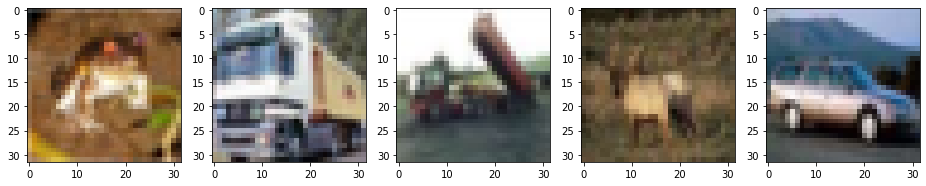

In [4]:
fig = plt.figure(figsize = (16,16))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(X_train[i])
plt.show()

In [5]:
X_train_n = X_train.astype('float32')/255
X_test_n = X_test.astype('float32')/255

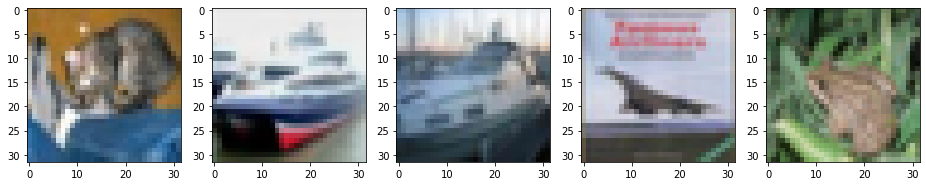

In [6]:
fig = plt.figure(figsize = (16,16))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(X_test_n[i])
plt.show()

In [7]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, LeakyReLU
from keras.models import Model
from keras import backend as K


##Base model for convolution autoencoder

In [19]:
def base_model():
  ip = Input(shape = (32,32,3))

  x = Conv2D(16, (3,3), activation ='relu', padding = 'same')(ip)
  x = MaxPooling2D((2,2), padding='same')(x)

  x = Conv2D(8, (3,3), activation ='relu', padding = 'same')(x)
  x = MaxPooling2D((2,2), padding='same')(x)

  x = Conv2D(8, (3,3), activation ='relu', padding = 'same')(x)
  x = MaxPooling2D((2,2), padding='same')(x)

  x = Conv2D(8, (3,3), activation ='relu', padding = 'same')(x)
  x = UpSampling2D((2,2))(x)

  x = Conv2D(8, (3,3), activation ='relu', padding = 'same')(x)
  x = UpSampling2D((2,2))(x)

  x = Conv2D(16, (3,3), activation ='relu', padding = 'same')(x)
  x = UpSampling2D((2,2))(x)

  x = Conv2D(3, (3,3), activation ='relu', padding = 'same')(x)

  return Model(ip, x)

In [20]:

ae = base_model()

ae.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 8, 8, 8)           584 

In [21]:
ae.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
                    loss = 'mae'
                    )
history = ae.fit(x = X_train_n, y= X_train_n, batch_size = 32, epochs = 50, validation_data=(X_test_n, X_test_n))

Epoch 1/50
1563/1563 [==============================] - 22s 8ms/step - loss: 0.1509 - val_loss: 0.1115
Epoch 2/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.1058 - val_loss: 0.1018
Epoch 3/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0990 - val_loss: 0.0967
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0949 - val_loss: 0.0934
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0920 - val_loss: 0.0909
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0898 - val_loss: 0.0891
Epoch 7/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0883 - val_loss: 0.0876
Epoch 8/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0870 - val_loss: 0.0865
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0860 - val_loss: 0.0856
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.08

In [23]:
pred = ae.predict(X_test_n, batch_size = 128)

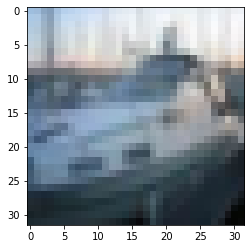

In [24]:
plt.imshow(X_test_n[2])

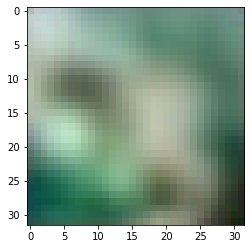

In [28]:
plt.imshow(pred[15])

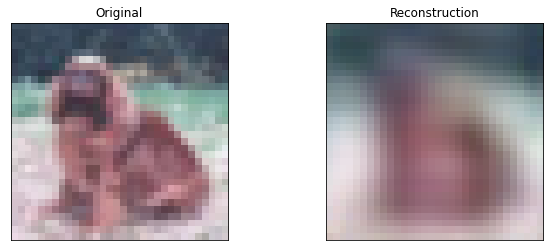

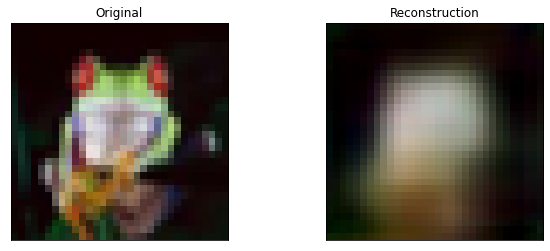

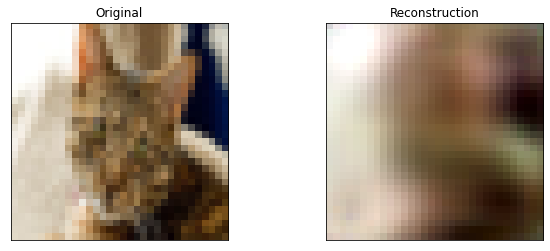

In [40]:
for i in range(3):
  fig = plt.figure(figsize=(16, 4))
        
  fig.add_subplot(131)
  plt.imshow(X_test_n[101+i])
  plt.xticks([])
  plt.yticks([])
  plt.title('Original')
  
  fig.add_subplot(132)
  plt.imshow(pred[101+i])
  plt.xticks([])
  plt.yticks([])
  plt.title('Reconstruction')

  plt.show()

##Bonus Part

In [47]:
def encoder():
  input_img = Input(shape = (32, 32,3))

  x = Conv2D(8, 3, padding = 'same')(input_img)
  x = LeakyReLU(0.2)(x)
  #x = MaxPooling2D((2,2), padding='same')(x)

  x = Conv2D(16, 3, padding = 'same')(x)
  x = BatchNormalization()(x)
  x = LeakyReLU(0.2)(x)

  x = Conv2D(32, 3, padding = 'same')(x)
  x = LeakyReLU(0.2)(x)

  x = Conv2D(32, 3, padding = 'same')(x)
  x = LeakyReLU(0.2)(x)
  x = MaxPooling2D((2,2), padding='same')(x)

  x = Conv2D(64, 3, padding = 'same')(x)
  x = BatchNormalization()(x)
  x = LeakyReLU(0.2)(x)

  x = Conv2D(64, 3,  padding = 'same')(x)
  x = MaxPooling2D((2,2), padding='same')(x)
  x = Conv2D(128, 3, padding = 'same')(x)
  x = LeakyReLU(0.2)(x)

  x = Conv2D(128, 3, padding = 'same')(x)
  x = MaxPooling2D((2,2), padding='same')(x)
  x = LeakyReLU(0.2)(x)

  x = Conv2D(256, 3, padding = 'same')(x)
  x = LeakyReLU(0.2)(x)
  encoded = MaxPooling2D((2,2), padding='same')(x)
  return Model(input_img, encoded)

In [48]:
enc = encoder()
enc.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_69 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 32, 32, 8)         0         
                                                                 
 conv2d_70 (Conv2D)          (None, 32, 32, 16)        1168      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 32, 32, 16)        0         
                                                           

In [ ]:
keras.utils.plot_model(enc, show_layer_activations=True, show_shapes=True,)

In [49]:
def decoder(enc_op_shape):
  dec_ip = Input(enc_op_shape)
  x = Conv2D(256, 3, padding = 'same')(dec_ip)
  x = BatchNormalization()(x)
  x = LeakyReLU(0.2)(x)
  x = Conv2D(128, 3,  padding = 'same')(x)
  x = BatchNormalization()(x)
  x = LeakyReLU(0.2)(x)
  x = UpSampling2D((2,2))(x)
  x = Conv2D(128, 3,  padding = 'same')(x)
  x = BatchNormalization()(x)
  x = LeakyReLU(0.2)(x)
  x = UpSampling2D((2,2))(x)
  x = Conv2D(64, 3,  padding = 'same')(x)
  x = LeakyReLU(0.2)(x)
  x = UpSampling2D((2,2))(x)
  x = Conv2D(64, 3,  padding = 'same')(x)
  x = LeakyReLU(0.2)(x)
  x = UpSampling2D((2,2))(x)
  x = Conv2D(32, 3,  padding = 'same')(x)
  x = LeakyReLU(0.2)(x)
  x = LeakyReLU(0.2)(x)
  x = Conv2D(32, 3,  padding = 'same')(x)
  x = LeakyReLU(0.2)(x)
  x = Conv2D(16, 3,  padding = 'same')(x)
  x = LeakyReLU(0.2)(x)
  x = Conv2D(8, 3,  padding = 'same')(x)
  x = LeakyReLU(0.2)(x)
  x = Conv2D(4, 3, padding = 'same')(x)
  
  x = LeakyReLU(0.2)(x)
  decoded = Conv2D(3, 3, activation ='sigmoid', padding = 'same')(x)

  return Model(dec_ip, decoded)

In [50]:
dec = decoder(enc.output_shape[1:])
dec.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 2, 2, 256)]       0         
                                                                 
 conv2d_78 (Conv2D)          (None, 2, 2, 256)         590080    
                                                                 
 batch_normalization_8 (Batc  (None, 2, 2, 256)        1024      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 2, 2, 256)         0         
                                                                 
 conv2d_79 (Conv2D)          (None, 2, 2, 128)         295040    
                                                                 
 batch_normalization_9 (Batc  (None, 2, 2, 128)        512       
 hNormalization)                                          

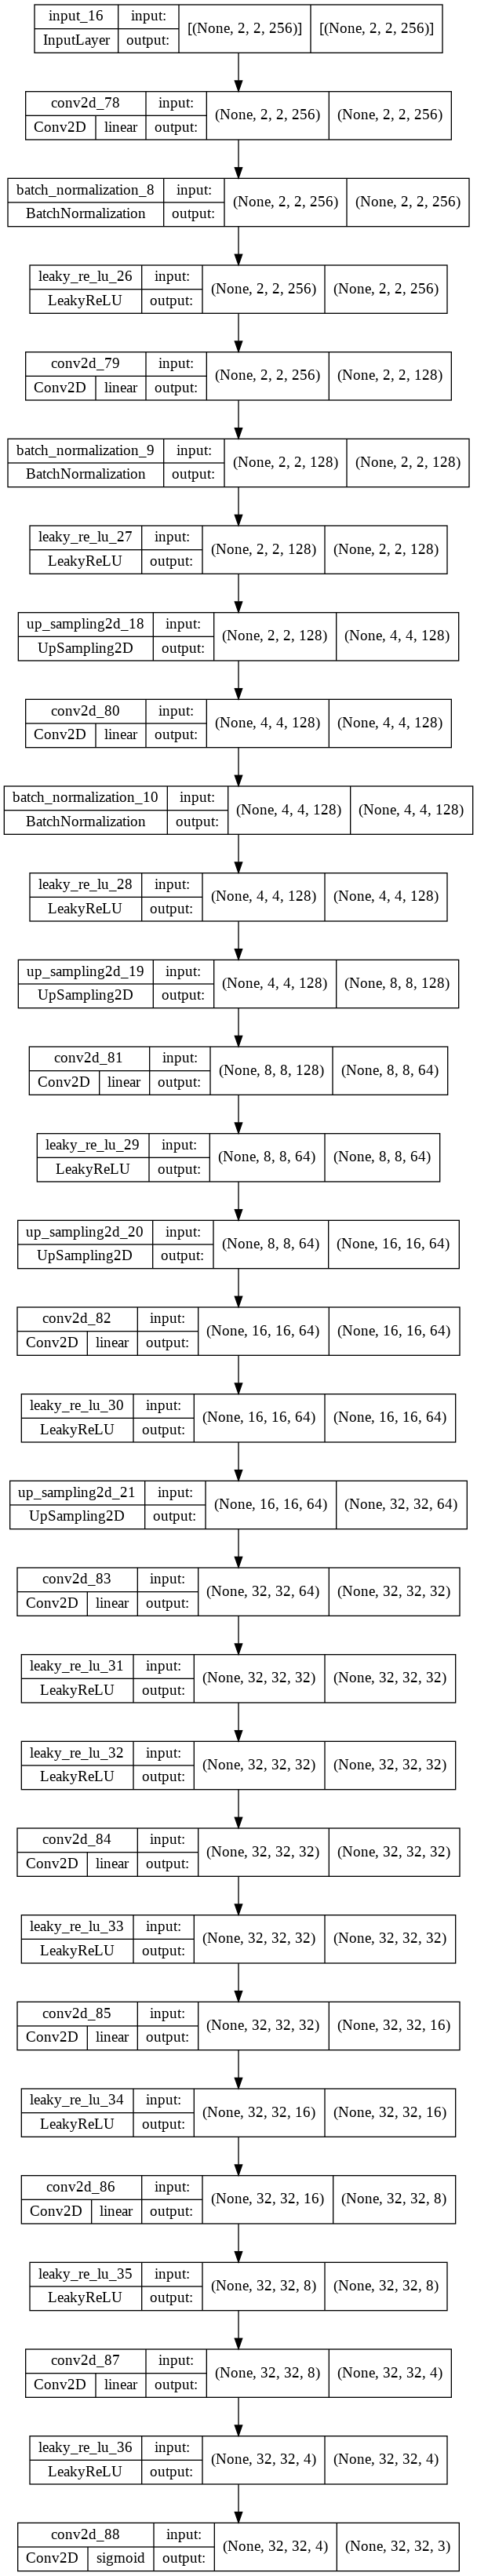

In [51]:
keras.utils.plot_model(dec, show_layer_activations=True, show_shapes=True,)

In [52]:
ip = Input(shape = (32,32,3))
encd = enc(ip)
decd = dec(encd)

autoencoder = Model(inputs = ip, outputs = decd)
autoencoder.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 model_9 (Functional)        (None, 2, 2, 256)         587632    
                                                                 
 model_10 (Functional)       (None, 32, 32, 3)         1179371   
                                                                 
Total params: 1,767,003
Trainable params: 1,765,819
Non-trainable params: 1,184
_________________________________________________________________


In [ ]:
keras.utils.plot_model(autoencoder, show_layer_activations=True, show_shapes=True,)

In [53]:
autoencoder.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
                    loss = 'mae'
                    )
history = autoencoder.fit(x = X_train_n, y= X_train_n, batch_size = 32, epochs = 50, validation_data=(X_test_n, X_test_n))

Epoch 1/50
1563/1563 [==============================] - 28s 16ms/step - loss: 0.1098 - val_loss: 0.0906
Epoch 2/50
1563/1563 [==============================] - 24s 16ms/step - loss: 0.0878 - val_loss: 0.0825
Epoch 3/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.0816 - val_loss: 0.0772
Epoch 4/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.0773 - val_loss: 0.0735
Epoch 5/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.0741 - val_loss: 0.0745
Epoch 6/50
1563/1563 [==============================] - 23s 14ms/step - loss: 0.0717 - val_loss: 0.0681
Epoch 7/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.0694 - val_loss: 0.0671
Epoch 8/50
1563/1563 [==============================] - 24s 16ms/step - loss: 0.0676 - val_loss: 0.0665
Epoch 9/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.0660 - val_loss: 0.0644
Epoch 10/50
1563/1563 [==============================] - 23s 15m

In [56]:
preds = autoencoder.predict(X_test_n, batch_size = 128)

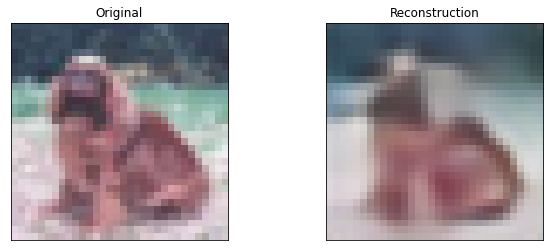

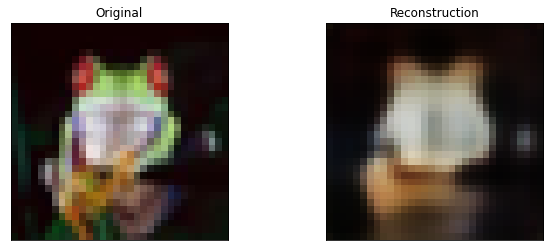

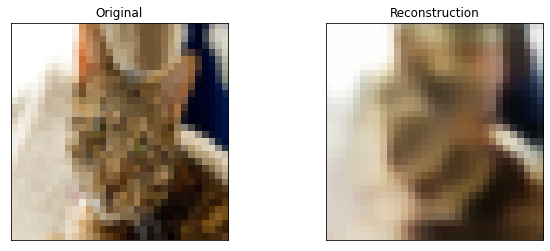

In [55]:
for i in range(3):
  fig = plt.figure(figsize=(16, 4))
        
  fig.add_subplot(131)
  plt.imshow(X_test_n[101+i])
  plt.xticks([])
  plt.yticks([])
  plt.title('Original')
  
  fig.add_subplot(132)
  plt.imshow(preds[101+i])
  plt.xticks([])
  plt.yticks([])
  plt.title('Reconstruction')

  plt.show()

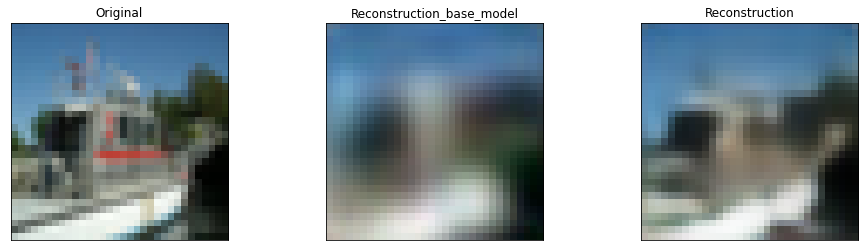

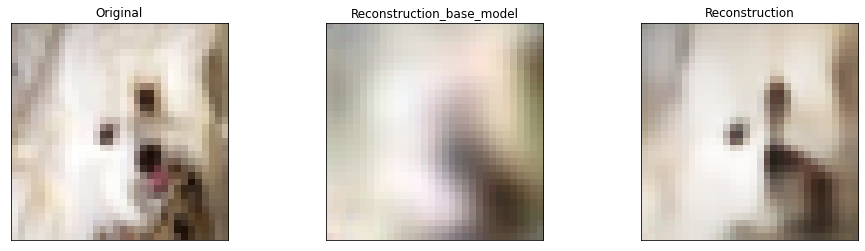

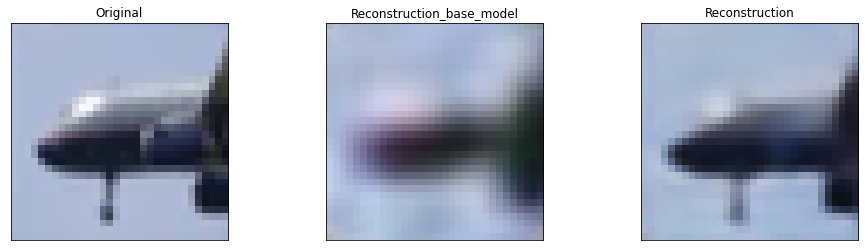

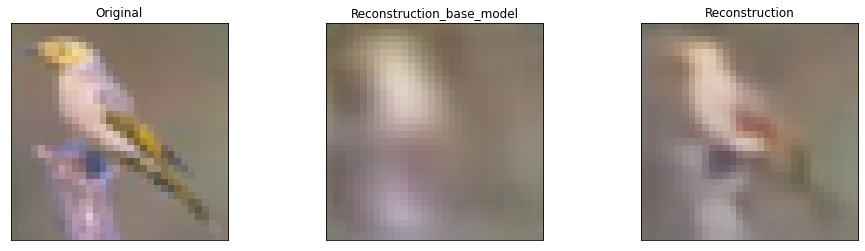

In [66]:
a = 600
for i in range(4):
  fig = plt.figure(figsize=(16, 4))
        
  fig.add_subplot(131)
  plt.imshow(X_test_n[a+i])
  plt.xticks([])
  plt.yticks([])
  plt.title('Original')
  
  fig.add_subplot(132)
  plt.imshow(pred[a+i])
  plt.xticks([])
  plt.yticks([])
  plt.title('Reconstruction_base_model')

  fig.add_subplot(133)
  plt.imshow(preds[a+i])
  plt.xticks([])
  plt.yticks([])
  plt.title('Reconstruction')

  plt.show()